# Quantum Circuit Basics

In [1]:
import numpy as np
import qiskit

## 1. GHZ state

Below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$
To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:

* A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
* A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
* A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

### Build the circuit

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = qiskit.QuantumCircuit(3)

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

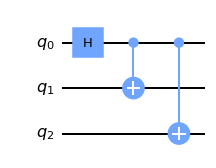

In [4]:
# visualize the circuit
circ.draw('mpl')

### Simulate the circuit

In [5]:
# execute on the statevector simulator
backend = qiskit.Aer.get_backend('statevector_simulator')
result = qiskit.execute(circ, backend=backend).result()
sv = result.get_statevector()

# statevector
sv

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [6]:
# probabilities
num_qubits = int(np.log2(len(sv)))
probs = {bin(i)[2:].zfill(num_qubits): np.abs(a)**2 for i, a in enumerate(sv) if a > 1e-15}
probs

{'000': 0.5000000000000001, '111': 0.4999999999999999}

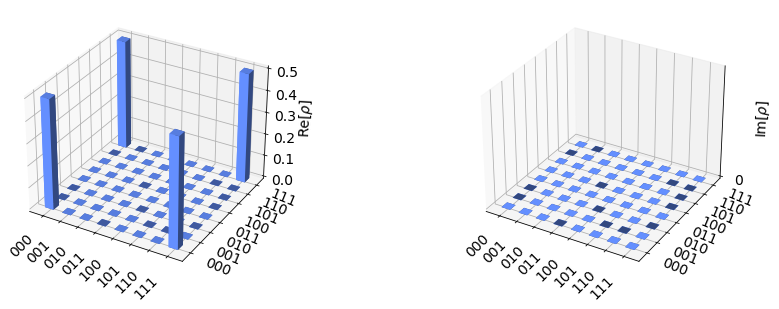

In [7]:
# visualize density matrix
qiskit.visualization.plot_state_city(sv)

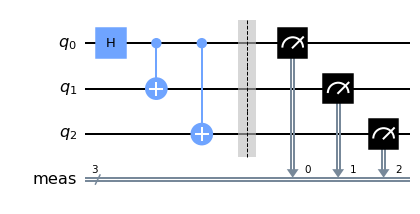

In [8]:
# add final measurements
circ.measure_all()

circ.draw('mpl')

state:	count
000:	499
111:	501


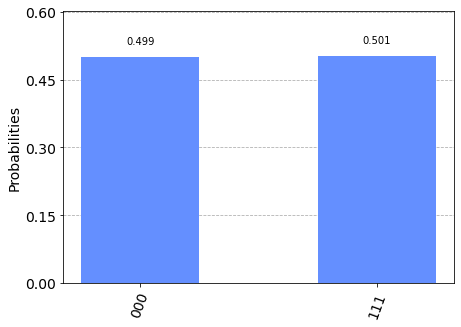

In [9]:
# execute on the qasm simulator
backend = qiskit.Aer.get_backend('qasm_simulator')
result = qiskit.execute(circ, backend=backend, shots=1000).result()
counts = result.get_counts()

print('state:\tcount')
for state, count in sorted(counts.items()):
    print('%s:\t%d' % (state, count))

qiskit.visualization.plot_histogram(counts)

### Execute on real hardware

In [10]:
from qiskit import IBMQ

#### Setup account

In [11]:
# save / load account
# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### Get backend

In [12]:
# List all available providers
IBMQ.providers(group='open')

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [13]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()  # list backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [14]:
backend = provider.get_backend('ibmq_santiago')

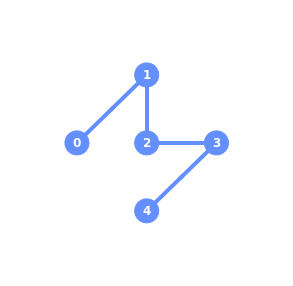

In [15]:
qiskit.visualization.plot_gate_map(backend)

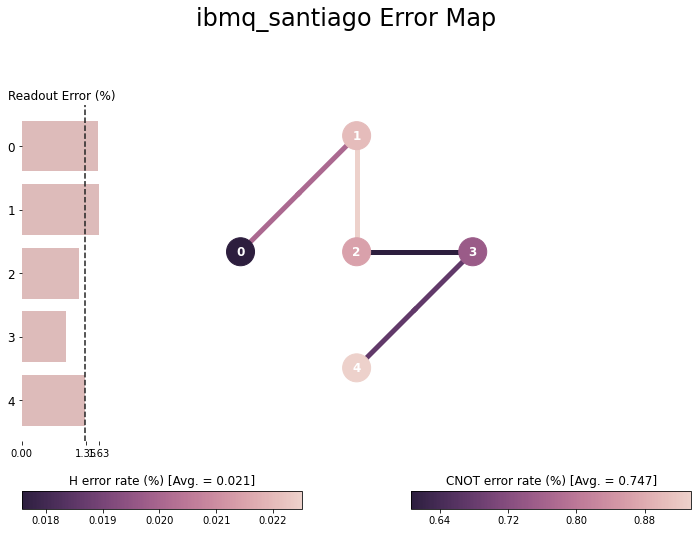

In [16]:
qiskit.visualization.plot_error_map(backend)

#### Transpile circuit

cx:  5
measure:  3
u2:  1
barrier:  1


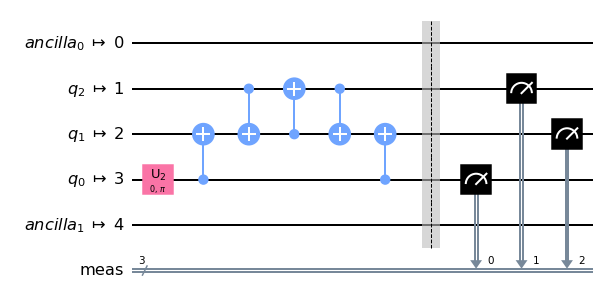

In [17]:
# transpile the circuit
qcc = qiskit.transpile(circ, backend=backend)
for op, count in qcc.count_ops().items():
    print('%s:  %d' % (op, count))
qcc.draw('mpl')

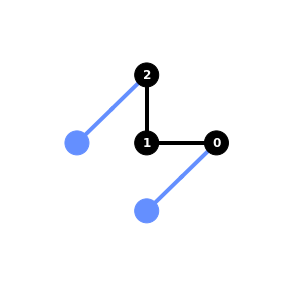

In [18]:
qiskit.visualization.plot_circuit_layout(qcc, backend)

#### Execute circuit

In [19]:
qobj = qiskit.assemble(qcc, backend=backend)
qobj.to_dict()

{'qobj_id': '5a9de8eb-d811-4062-9bf5-fa732a01774f',
 'header': {'backend_name': 'ibmq_santiago', 'backend_version': '1.2.0'},
 'config': {'shots': 1024,
  'memory': False,
  'parameter_binds': [],
  'init_qubits': True,
  'parametric_pulses': ['gaussian', 'gaussian_square', 'drag', 'constant'],
  'memory_slots': 3,
  'n_qubits': 5},
 'schema_version': '1.3.0',
 'type': 'QASM',
 'experiments': [{'config': {'n_qubits': 5, 'memory_slots': 3},
   'header': {'qubit_labels': [['q', 0],
     ['q', 1],
     ['q', 2],
     ['q', 3],
     ['q', 4]],
    'n_qubits': 5,
    'qreg_sizes': [['q', 5]],
    'clbit_labels': [['meas', 0], ['meas', 1], ['meas', 2]],
    'memory_slots': 3,
    'creg_sizes': [['meas', 3]],
    'name': 'circuit7',
    'global_phase': 0.0},
   'instructions': [{'name': 'u2',
     'params': [0.0, 3.141592653589793],
     'qubits': [3]},
    {'name': 'cx', 'qubits': [3, 2]},
    {'name': 'cx', 'qubits': [1, 2]},
    {'name': 'cx', 'qubits': [2, 1]},
    {'name': 'cx', 'qubits'

In [20]:
job = backend.run(qobj)
job.job_id()

'5fc1b9c48acbe40019c96e2e'

In [21]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

#### Get result

In [22]:
# retrieve job from backend by job id
job_id = '5fc1b9c48acbe40019c96e2e'
job = backend.retrieve_job(job_id)

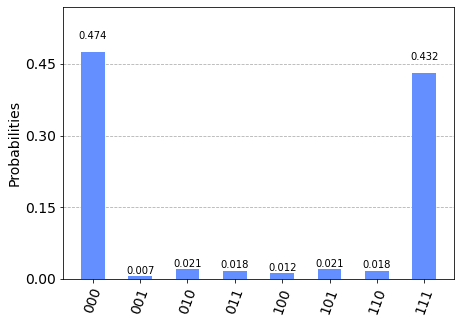

In [23]:
result = job.result()
counts = result.get_counts()
qiskit.visualization.plot_histogram(counts)

#### Serialize / deserialize results

In [24]:
import pickle

In [25]:
# serialize job & result objects
with open('job.pkl', 'wb') as f:
    pickle.dump(job, f)
    
with open('result.pkl', 'wb') as f:
    pickle.dump(result, f)

In [26]:
# load serialized job & result objects
with open('job.pkl', 'wb') as f:
    pickle.dump(job, f)
    
with open('result.pkl', 'wb') as f:
    pickle.dump(result, f)

## 2. XOR of two qubits

In [27]:
# build the circuit
qa = qiskit.QuantumRegister(1, 'a')
qb = qiskit.QuantumRegister(1, 'b')
qout = qiskit.QuantumRegister(1, 'out')
qc = qiskit.QuantumCircuit(qa, qb, qout, name='xor')

qc.h(qa)
qc.h(qb)

qc.barrier()

qc.cx(qa, qout)
qc.cx(qb, qout)

qc.measure_all()

qc.draw()

┌───┐ ░            ░ ┌─┐      
   a_0: ┤ H ├─░───■────────░─┤M├──────
        ├───┤ ░   │        ░ └╥┘┌─┐   
   b_0: ┤ H ├─░───┼────■───░──╫─┤M├───
        └───┘ ░ ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
 out_0: ──────░─┤ X ├┤ X ├─░──╫──╫─┤M├
              ░ └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════╩══╩══╩═
                              0  1  2

xor	b	a:	count
0	0	0:	248
0	1	1:	252
1	0	1:	266
1	1	0:	234


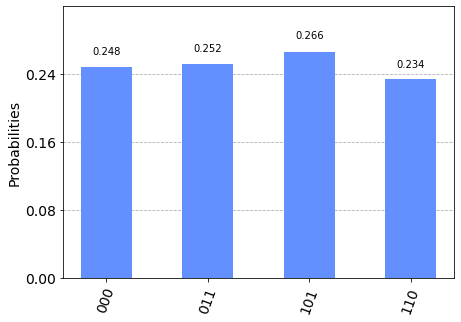

In [28]:
# execute on the qasm simulator
backend = qiskit.Aer.get_backend('qasm_simulator')
result = qiskit.execute(qc, backend=backend, shots=1000).result()
counts = result.get_counts()

print('xor\tb\ta:\tcount')
for state, count in sorted(counts.items()):
    print('%s\t%s\t%s:\t%d' % (state[0], state[1], state[2], count))

qiskit.visualization.plot_histogram(counts)

## 3. AND of two qubits

In [29]:
# build the circuit
qa = qiskit.QuantumRegister(1, 'a')
qb = qiskit.QuantumRegister(1, 'b')
qout = qiskit.QuantumRegister(1, 'out')
qc = qiskit.QuantumCircuit(qa, qb, qout, name='and')

qc.h(qa)
qc.h(qb)

qc.barrier()

qc.ccx(qa, qb, qout)

qc.measure_all()

qc.draw()

┌───┐ ░       ░ ┌─┐      
   a_0: ┤ H ├─░───■───░─┤M├──────
        ├───┤ ░   │   ░ └╥┘┌─┐   
   b_0: ┤ H ├─░───■───░──╫─┤M├───
        └───┘ ░ ┌─┴─┐ ░  ║ └╥┘┌─┐
 out_0: ──────░─┤ X ├─░──╫──╫─┤M├
              ░ └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════╩══╩══╩═
                         0  1  2

and	b	a:	count
0	0	0:	251
0	0	1:	264
0	1	0:	253
1	1	1:	232


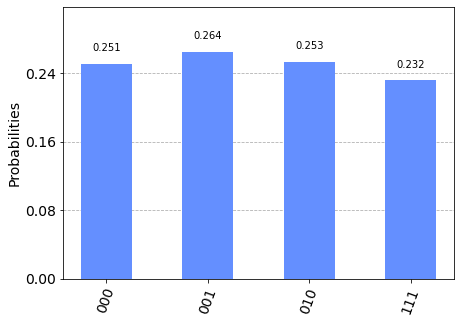

In [30]:
# execute on the qasm simulator
backend = qiskit.Aer.get_backend('qasm_simulator')
result = qiskit.execute(qc, backend=backend, shots=1000).result()
counts = result.get_counts()

print('and\tb\ta:\tcount')
for state, count in sorted(counts.items()):
    print('%s\t%s\t%s:\t%d' % (state[0], state[1], state[2], count))

qiskit.visualization.plot_histogram(counts)

## 4. Adding two qubits

In [31]:
# build the circuit
qa = qiskit.QuantumRegister(1, 'a')
qb = qiskit.QuantumRegister(1, 'b')
qout = qiskit.QuantumRegister(2, 'sum')
qc = qiskit.QuantumCircuit(qa, qb, qout, name='sum')

qc.h(qa)
qc.h(qb)

qc.barrier()

# add lower bit
qc.cx(qa, qout[0])
qc.cx(qb, qout[0])

# add carry bit
qc.ccx(qa, qb, qout[1])

qc.measure_all()

qc.draw()

┌───┐ ░                 ░ ┌─┐         
   a_0: ┤ H ├─░───■─────────■───░─┤M├─────────
        ├───┤ ░   │         │   ░ └╥┘┌─┐      
   b_0: ┤ H ├─░───┼────■────■───░──╫─┤M├──────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░  ║ └╥┘┌─┐   
 sum_0: ──────░─┤ X ├┤ X ├──┼───░──╫──╫─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
 sum_1: ──────░───────────┤ X ├─░──╫──╫──╫─┤M├
              ░           └───┘ ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════════╩══╩══╩══╩═
                                   0  1  2  3

sum	b	a:	count
00	0	0:	229
01	0	1:	273
01	1	0:	263
10	1	1:	235


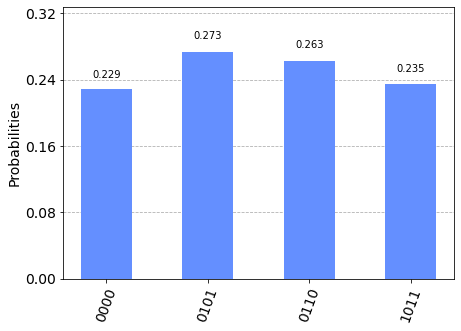

In [32]:
# execute on the qasm simulator
backend = qiskit.Aer.get_backend('qasm_simulator')
result = qiskit.execute(qc, backend=backend, shots=1000).result()
counts = result.get_counts()

print('sum\tb\ta:\tcount')
for state, count in sorted(counts.items()):
    print('%s\t%s\t%s:\t%d' % (state[:2], state[2], state[3], count))

qiskit.visualization.plot_histogram(counts)

## Version information

In [33]:
import qiskit.tools.jupyter
%qiskit_version_table